# Keras - 01
---

In [33]:
!pip install tensorflow
!pip install keras

In [34]:
import keras
keras.__version__

'2.12.0'

## MNIST
---

- MNIST 데이터셋을 활용하여 Keras 실습을 진행해본다.

In [35]:
from keras.datasets import mnist

(train_images, train_labels),( test_images, test_labels) = mnist.load_data()

- 28x28 크기의 학습용 이미지가 총 60,000장 있다.

In [36]:
train_images.shape

(60000, 28, 28)

- 28x28 크기의 테스트 이미지가 총 60,000장 있다.

In [37]:
test_images.shape

(10000, 28, 28)

- 데이터를 확인해본다.

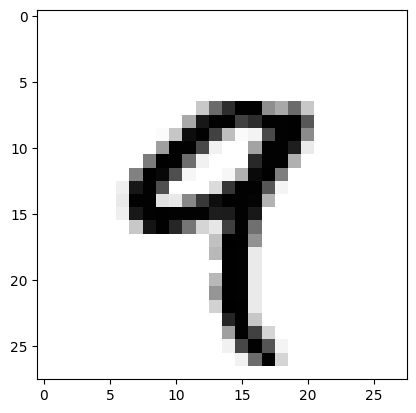

In [38]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

- 신경망을 만들어본다.

In [39]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

- 데이터를 준비한다. 데이터 타입을 `float` 형태로 바꿔준 후, 모든 데이터의 값들을 `0`에서 `1` 사이의 값으로 변환한다. (TensorFlow가 데이터 처리를 수월하게 하도록 하기 위해서)

In [40]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255    # 타입 변환 : int -> float

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

- 라벨 데이터를 카테고리 데이터로 변환한다.

In [41]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- 신경망으로 학습해본다. 학습 정확도이므로 실제 정확도는 아니다.

In [42]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2681 - accuracy: 0.9227
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1083 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0705 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0505 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0378 - accuracy: 0.9886


- 평가를 통해 정확도를 확인해본다.

In [43]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9807
test acc: 0.9807000160217285


## IMDB
---

- IMDB 데이터셋을 활용하여 Keras 실습을 진행해본다.

In [44]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [45]:
train_data.shape

(25000,)

- 라벨 데이터를 확인해본다. (긍정 : `1`, 부정 : `0`)

In [46]:
train_labels[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

- 가장 많이 출현한 단어의 개수 최댓값을 확인해본다.

In [47]:
max([max(sequence) for sequence in train_data])

9999

- 데이터를 준비한다. Vectorize 작업을 수행한다.

In [48]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))

  print(result.shape)

  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1
  return result

In [49]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


- 25,000개의 리뷰에서 빈도 높은 단어 10,000개 중에 사용된 단어에 `1`을 지정한 것이다.

In [50]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

- 라벨 데이터를 실수형으로 바꾼다.

In [51]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [52]:
y_train[0]

1.0

- 신경망을 제작해본다.

In [53]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

- 학습을 진행해본다.

In [55]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 1s 22ms/step - loss: 0.5215 - accuracy: 0.7641 - val_loss: 0.3785 - val_accuracy: 0.8719
Epoch 2/4
30/30 [==============================] - 0s 10ms/step - loss: 0.3112 - accuracy: 0.8953 - val_loss: 0.3018 - val_accuracy: 0.8877
Epoch 3/4
30/30 [==============================] - 0s 10ms/step - loss: 0.2324 - accuracy: 0.9207 - val_loss: 0.2791 - val_accuracy: 0.8912
Epoch 4/4
30/30 [==============================] - 0s 9ms/step - loss: 0.1865 - accuracy: 0.9375 - val_loss: 0.2733 - val_accuracy: 0.8913


- 히스토리에 학습 내용을 저장해본다.

In [56]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

- 시각화를 진행해본다. `loss`가 낮고, `accuracy`가 높을수록 좋다.

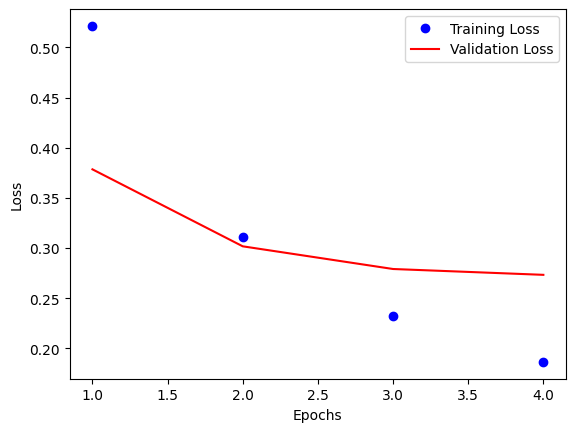

In [57]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

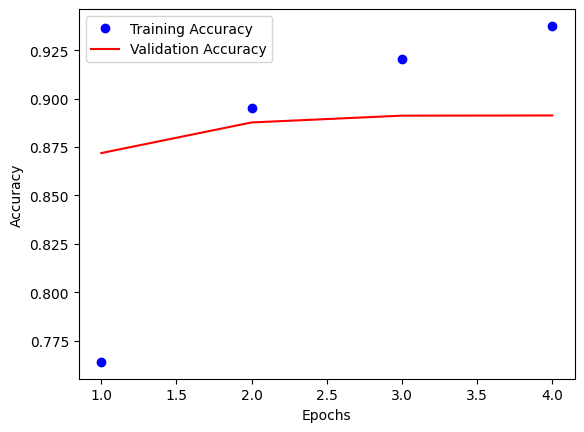

In [58]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

- 예측값을 확인해본다.

In [59]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.26080215],
       [0.9990057 ],
       [0.9308175 ],
       ...,
       [0.09987715],
       [0.14900851],
       [0.5129945 ]], dtype=float32)

- 정확도를 확인해본다.

In [60]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss={0}, accuracy={1}'.format(test_loss, test_acc))

782/782 [==============================] - 1s 1ms/step - loss: 0.2888 - accuracy: 0.8833
loss=0.28880614042282104, accuracy=0.8832799792289734
